In [1]:
import visual_behavior.database as db
from visual_behavior.utilities import EyeTrackingData

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def make_eye_matrix_plot(ed, oeid):
    fig,ax=plt.subplots(10,10,figsize=(15,13))
    
    frames = np.linspace(0,len(ed.ellipse_fits['pupil'])-1,100).astype(int)
    for ii,frame in enumerate(frames):
        axis = ax.flatten()[ii]
        axis.imshow(ed.get_annotated_frame(frame))
        axis.axis('off')
        axis.text(5,5,'frame {}'.format(frame),ha='left',va='top',color='yellow',fontsize=8)

    fig.tight_layout()
    plt.subplots_adjust(wspace=0,hspace=0,top=0.95)
    fig.suptitle('ophys session ID = {}\nophys experiment ID = {}'.format(ed.ophys_session_id, oeid))
    return fig,ax

In [3]:
ophys_experiment_ids = [
    839717723,
    864430700,
]

## eye tracking data exists for these sessions:

In [6]:
for ophys_experiment_id in ophys_experiment_ids:
    ophys_session_id = db.convert_id({'ophys_experiment_id':ophys_experiment_id},'ophys_session_id')
    wkf = db.get_well_known_files(ophys_session_id)
    print('eye tracking exists? {}'.format('EyeTracking Ellipses' in wkf['name'].to_list()))

eye tracking exists? True
eye tracking exists? True


## make plots

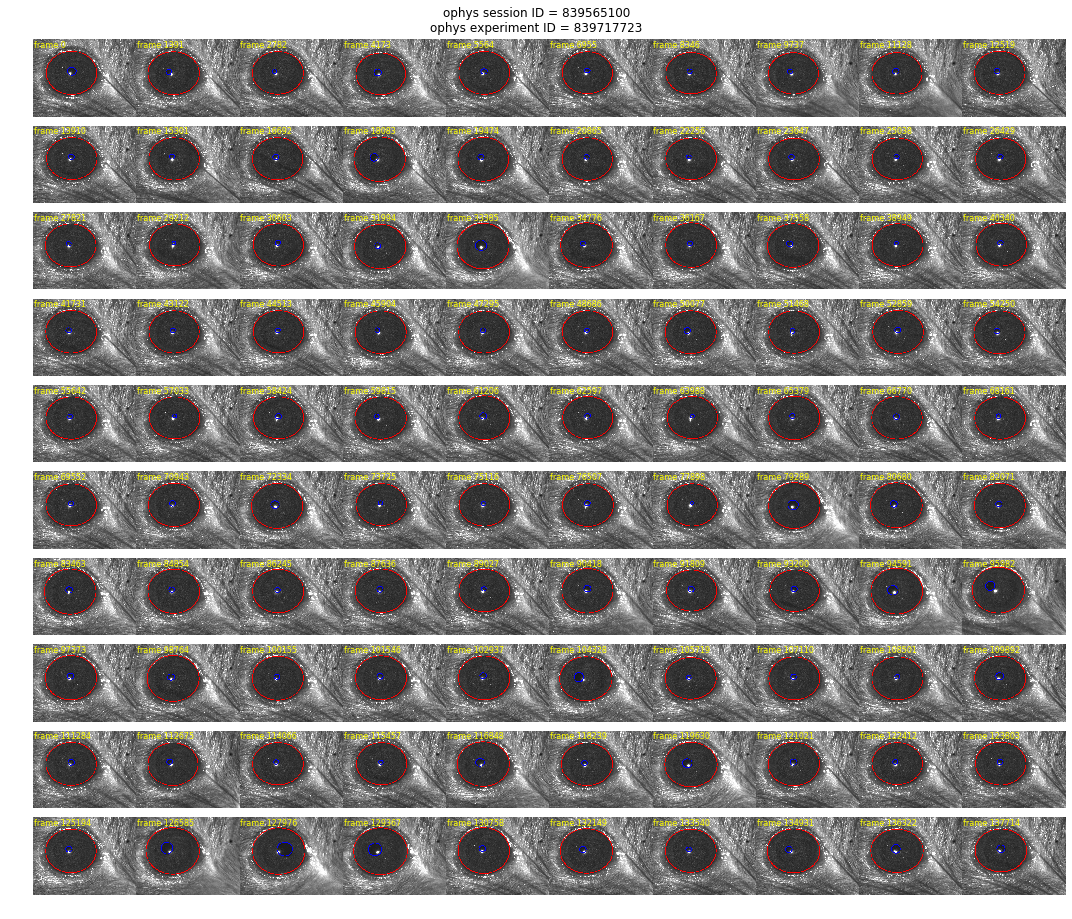

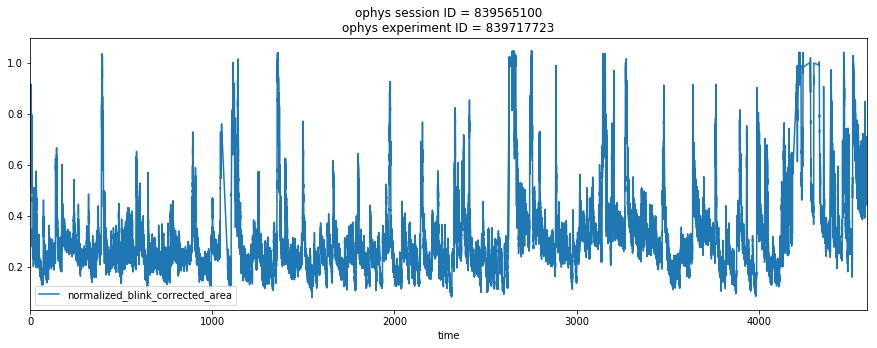

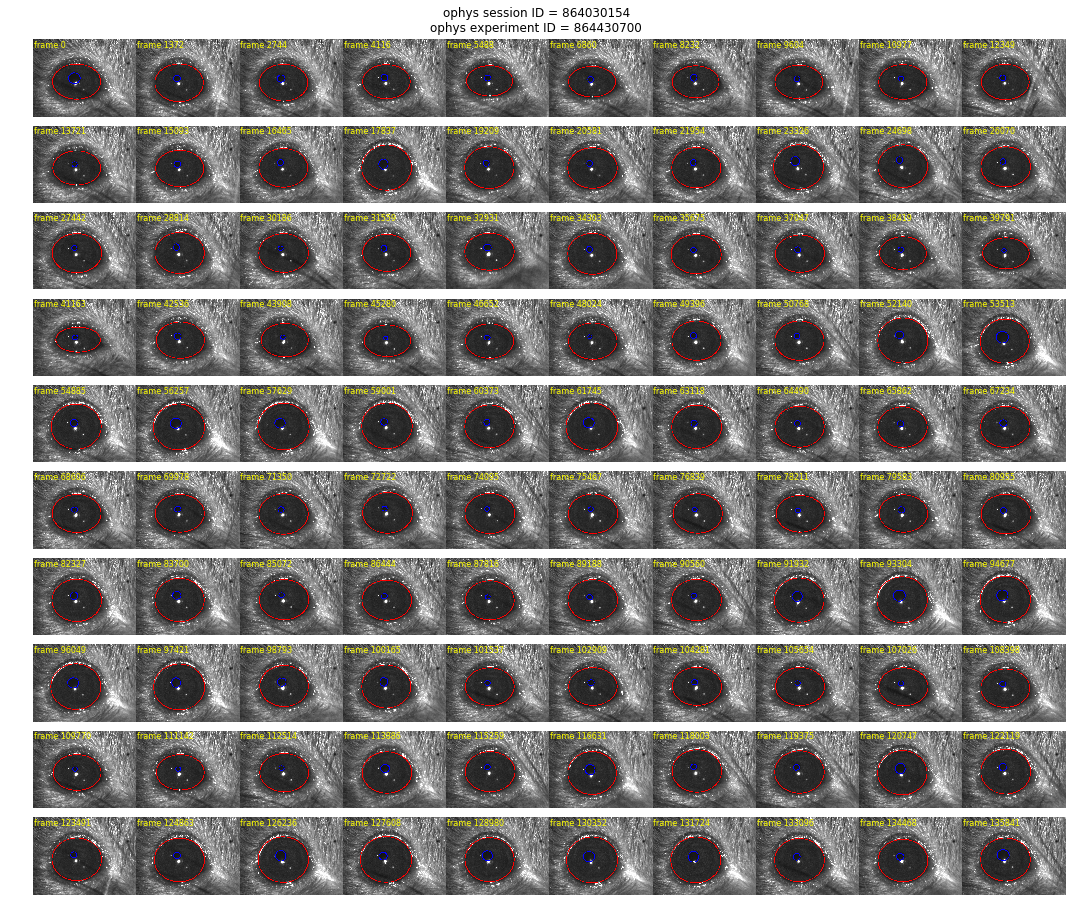

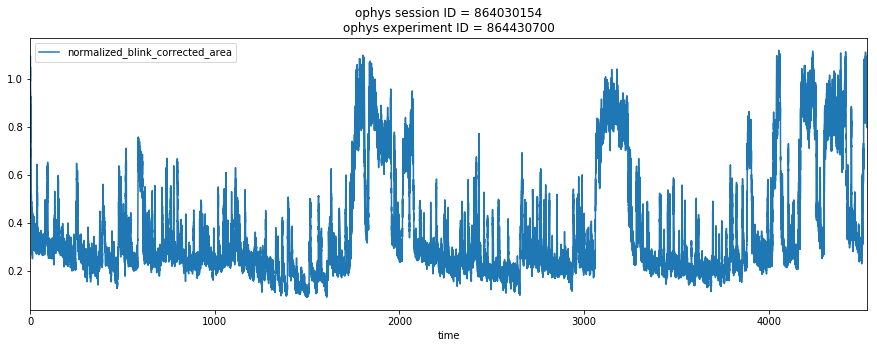

In [8]:
for ophys_experiment_id in ophys_experiment_ids:
    ophys_session_id = db.convert_id({'ophys_experiment_id':ophys_experiment_id},'ophys_session_id')
    ed = EyeTrackingData(ophys_session_id)
    
    fig_eye, ax_eye=make_eye_matrix_plot(ed,ophys_experiment_id)
    
    fig_ts, ax_ts = plt.subplots(figsize=(15,5))
    ed.ellipse_fits['pupil'].plot(x='time',y='normalized_blink_corrected_area',ax=ax_ts)
    ax_ts.set_title('ophys session ID = {}\nophys experiment ID = {}'.format(ed.ophys_session_id, ophys_experiment_id))
